In [156]:
import numpy as np
import os, glob
from numba.decorators import autojit

In [157]:
class ElecpySession(object):
    
    def __init__(self, path):
        
        self.path = path
        
        self.vmem_files = sorted( glob.glob(os.path.join(self.path, 'vmem*.npy')))
        self.phie_files = sorted( glob.glob(os.path.join(self.path, 'phie*.npy')))
        assert len(self.vmem_files) ==  len(self.phie_files)
        
        _L = len(self.vmem_files)
        _img_vmem = np.load(self.vmem_files[0])
        _img_phie = np.load(self.phie_files[0])       
        assert _img_vmem.shape == _img_phie.shape
        
        self.vmem = np.zeros(np.concatenate(([_L], _img_vmem.shape)), dtype=_img_vmem.dtype)
        self.phie = np.zeros(np.concatenate(([_L], _img_phie.shape)), dtype=_img_phie.dtype)
        
        for i, _f in enumerate(self.vmem_files): self.vmem[i,:,:] = np.load(_f)
        for i, _f in enumerate(self.phie_files): self.phie[i,:,:] = np.load(_f)
            
        def pixelwise_normalize(X):
            L, M, N = X.shape
            ret = np.zeros_like(X)
            for i in range(M):
                for j in range(N):
                    ts = X[:,i,j]
                    ret[:, i, j] = (ts-ts.min())/(abs(ts.max() - ts.min())+1.0e-30)
            return ret
                    
        _func = autojit(pixelwise_normalize)
        self.vmem = _func(self.vmem)
        self.phie = _func(self.phie)
        
        return
        

In [158]:
path = '/mnt/recordings/SimulationResult/2018-02-01/'
# !ls /mnt/recordings/SimulationResult/2018-02-01/

In [159]:
sess = ElecpySession(path)
len(sess.vmem)

942

In [ ]:
import matplotlib.animation as animation
from IPython.display import HTML

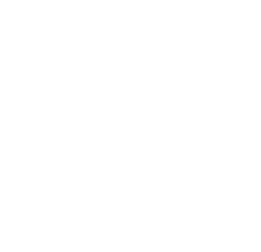

In [170]:
fig = plt.figure()
plt.axis('off')

ims = []
for img in sess.vmem:
    im = plt.imshow(
        img,
        vmin = 0, vmax = 1.0,
        cmap='hot',
        interpolation='nearest')
    ims.append([im])

ani = animation.ArtistAnimation(fig, ims)
#ani.save('anim.gif', writer="imagemagick")
#ani.save('anim.mp4', writer="ffmpeg")
#plt.show()

HTML(ani.to_html5_video())

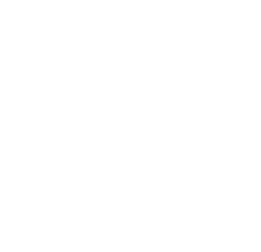

In [171]:
fig = plt.figure()
plt.axis('off')

ims = []
for img in sess.phie:
    im = plt.imshow(
        img,
        vmin = 0, vmax = 1.0,
        cmap='hot',
        interpolation='nearest')
    ims.append([im])

ani = animation.ArtistAnimation(fig, ims)
#ani.save('anim.gif', writer="imagemagick")
#ani.save('anim.mp4', writer="ffmpeg")
#plt.show()

HTML(ani.to_html5_video())

In [160]:
sample_x = 100
sample_y = 100

In [161]:
import matplotlib.pyplot as plt
%matplotlib inline

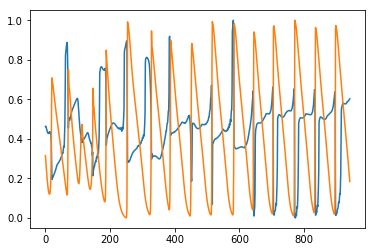

In [173]:
plt.plot(sess.phie[:,sample_y, sample_x])
plt.plot(sess.vmem[:,sample_y, sample_x])

In [163]:
X = np.array([_image.flatten() for _image in sess.phie]).T
Y = np.array([_image.flatten() for _image in sess.vmem]).T

In [164]:
import random

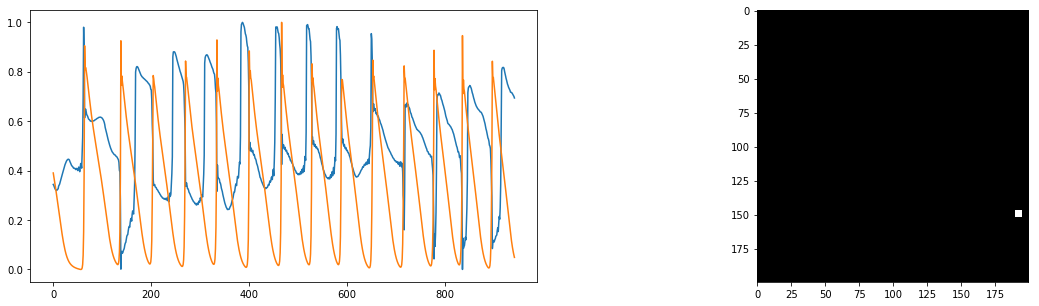

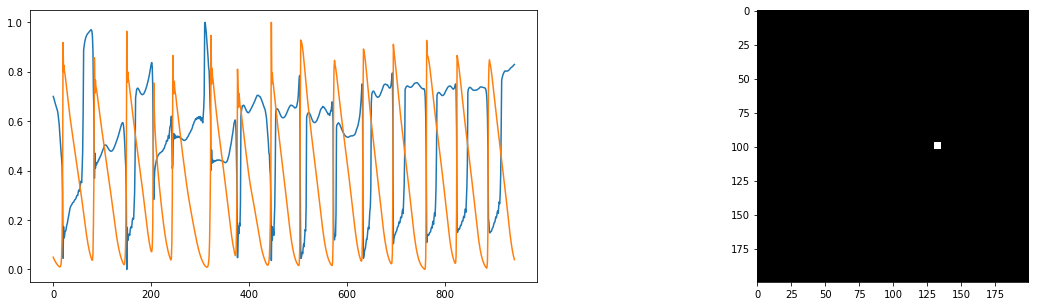

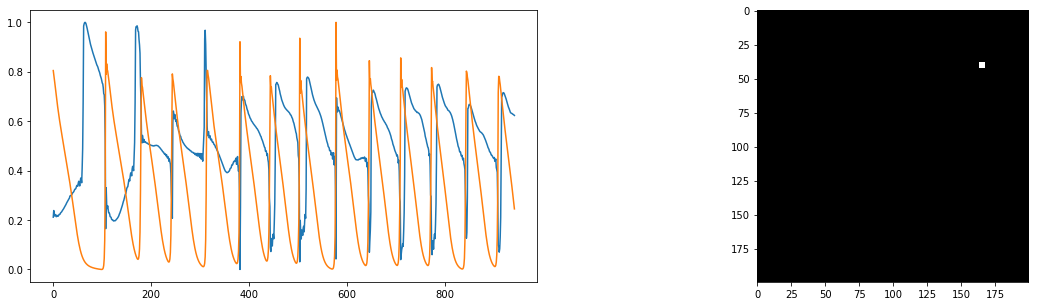

In [182]:
L, H, W = sess.vmem.shape
for _ in range(3):
    plt.figure(figsize=(20,5))
    i = random.randint(0,len(X)-1)
    plt.subplot(121)
    plt.plot(X[i,:])
    plt.plot(Y[i,:])
    plt.subplot(122)
    img = np.zeros((H, W))
    y = i // W
    x = i % W
    img[y-2:y+3, x-2:x+3] = 1
    plt.imshow(img, cmap='gray')
    plt.show()

In [196]:
L, H, W = sess.vmem.shape

In [197]:
def _norm(ts):
    return (ts - ts.min()) / (ts.max() - ts.min() + 1.0e-30)

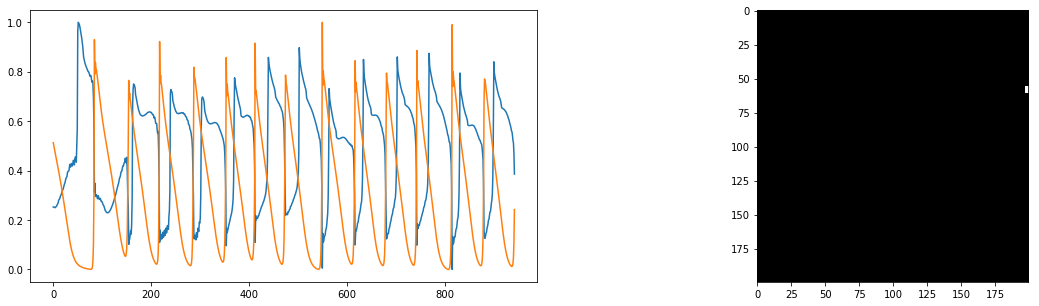

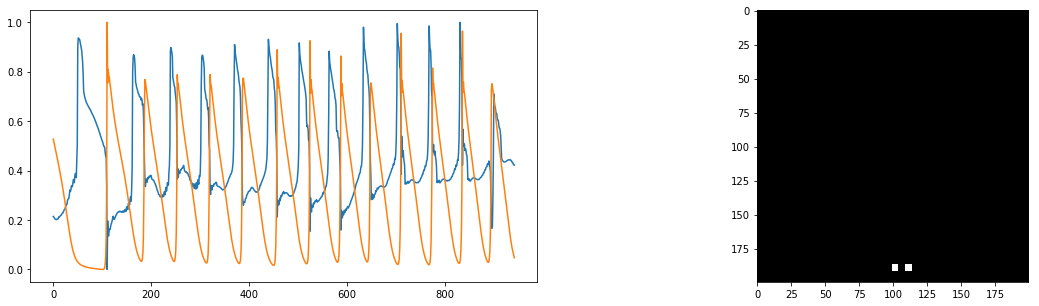

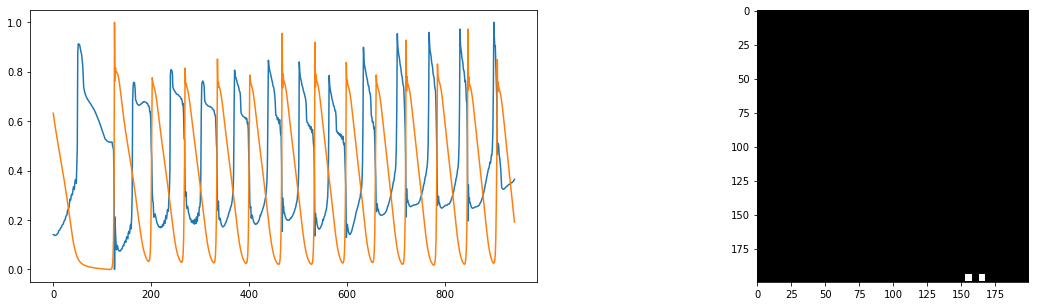

In [199]:
for _ in range(3):
    plt.figure(figsize=(20,5))
    i = random.randint(0,len(X)-1)
    bipolar = X[i,:] - X[min(i+10, W-1),:] 
    bipolar -= np.mean(bipolar)
    plt.subplot(121)
    plt.plot(_norm( bipolar ))
    #plt.plot(_norm(( bipolar )**2))
    plt.plot(Y[i,:])
    plt.subplot(122)
    img = np.zeros((H, W))
    y = i // W
    x = i % W
    img[y-2:y+3, x-2:x+3] = 1
    img[y-2:y+3, x+10-2:x+10+3] = 1
    plt.imshow(img, cmap='gray')
    plt.show()

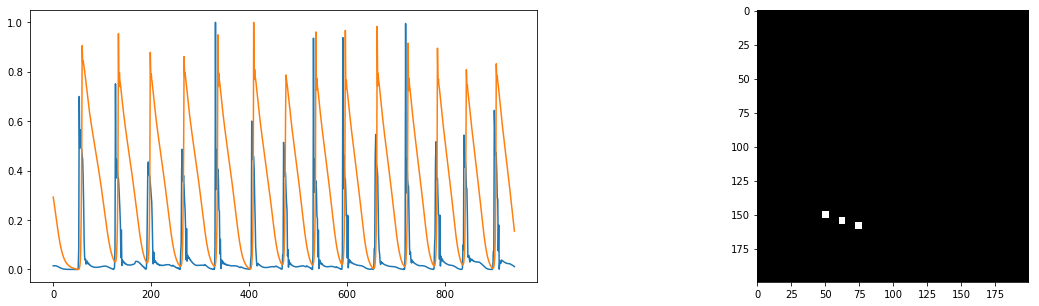

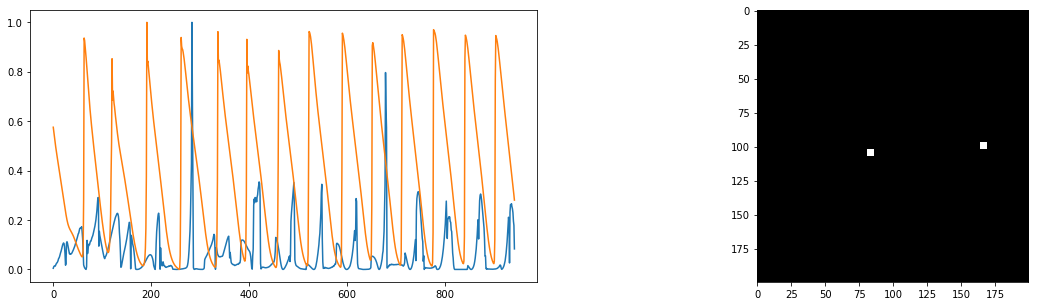

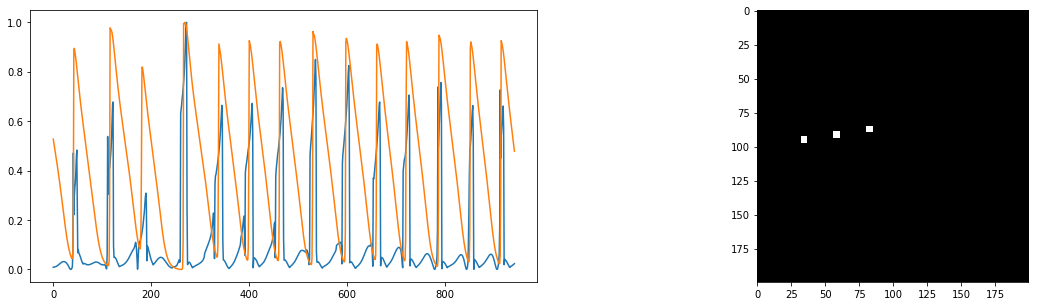

In [210]:
L, H, W = sess.vmem.shape
for _ in range(3):
    plt.figure(figsize=(20,5))
    i = random.randint(0,len(X)-1)
    j = random.randint(0,len(X)-1)
    bipolar = X[i,:] - X[j,:] 
    bipolar -= np.mean(bipolar)
    plt.subplot(121)
#     plt.plot(_norm(bipolar ))
    plt.plot(_norm( bipolar **2))
    
    y_i = i // W
    x_i = i % W
    y_j = j // W
    x_j = j % W
    x = (x_i + x_j) //2
    y = (y_i + y_j) //2
    k = y*W+x
    plt.plot(Y[k,:])
    plt.subplot(122)
    img = np.zeros((H, W))
    
    img[y_i-2:y_i+3, x_i-2:x_i+3] = 1
    img[y_j-2:y_j+3, x_j-2:x_j+3] = 1
    img[y  -2:y  +3, x  -2:x  +3] = 1
    plt.imshow(img, cmap='gray')
    plt.show()